In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**INTRODUCTION**

Bank Indessa is currently grappling with a pressing challenge: an alarming rise in Non-Performing Assets (NPAs). This surge, largely attributed to loan defaulters, has eroded investor trust and led to a significant 20% decline in stock value within a mere quarter. For a bank intrinsically tied to its community's economic well-being, such a downturn is not only concerning but demands immediate attention.

A deeper dive reveals that the solution might be within the bank's own archives. The vast reservoirs of data, accumulated over years, hold potential insights into patterns of loan defaults. In today's digital age, leveraging machine learning could transform this raw, unstructured data into actionable insights, enabling the bank to predict potential defaulters.

Adding complexity to this task is the bank's unique operational model. Unlike conventional banking systems, Bank Indessa collaborates with a pool of investors in the loan sanctioning process. Each loan application undergoes due diligence from both the bank and its investors. This collaborative approach, though enriching, requires a nuanced risk assessment strategy.

Through this project, by predicting loan default probabilities, we aim to equip Bank Indessa with the necessary foresight to devise strategies that ensure its future stability and growth.

**TASK DESCRIPTION** 

Bank Indessa, despite its commendable legacy, is currently grappling with an alarming rise in Non-Performing Assets (NPAs). This uptick, predominantly attributed to loan defaulters, has cast shadows over investor confidence and has been a catalyst for a sharp decline in stock value. This project aims to employ machine learning to predict potential defaulters, thereby assisting Bank Indessa in preempting loan defaults and formulating strategic interventions.

Here's our structured plan of action:

**Data Acquisition**: Our first step involves consolidating the loan data from Bank Indessa's archives. This dataset, encompassing fields like 'loan_amnt', 'annual_inc', 'dti', 'loan_status', and more, will provide a comprehensive overview of the bank's loan distribution and its associated dynamics.

**Data Cleaning and Preprocessing**: Given the historical accumulation of data, inconsistencies and missing values are expected. Our focus will be on cleaning the data, handling missing data, and ensuring its readiness for subsequent stages.

**Feature Engineering**: Leveraging the columns provided, we will craft new features or modify existing ones to better capture the intricacies of loan default patterns. This transformation ensures that our algorithms can effectively discern potential defaulters.

**Model Development**: 
  We will utilize the XGBClassifier for our analytical exploration. The rationale behind this decision is as follows:: 
  
     **NonLinearPatterns**: XGBoost excels at capturing intricate non-linear relationships in the data, making it suitable for predicting complex behaviors such as loan defaults.
  
    **RobustToOutliers**: Given its tree-based nature, XGBoost is resilient to outliers, which can be common in financial data.
 
    **FeatureInteractions**: XGBoost can automatically identify and leverage interactions between features, which might be vital when considering various factors determining loan defaults.
 
    **HighPerformance**: Historically, XGBoost has a track record of delivering top-notch performance on a wide range of classification tasks, making it a reliable choice.
 
    **MissingDataHandling**: XGBoost has built-in mechanisms for handling missing data, a common issue in real-world datasets, especially in finance.
  
    
**Model Assessment**: Validating the models is crucial. We'll employ an array of metrics, including accuracy, precision, recall, F1 score, and the area under the ROC curve, to holistically gauge the models' proficiency in predicting loan defaults.

**Feature Significance Analysis**: Post-modeling, we'll delve deep to identify the key features that are pivotal in predicting loan defaults. This introspection offers actionable insights for the bank's risk assessment teams.

**Visualization and Reporting**: Synthesizing our findings into accessible insights is vital. Employing a suite of visualization tools, we'll craft comprehensive reports detailing our findings, predictions, and recommendations.

In culmination, this project seeks to arm Bank Indessa with a predictive tool capable of flagging potential loan defaulters. By proactively identifying risks, the bank can recalibrate its loan sanctioning strategies, restore investor trust, and pave the path toward financial stability.

**DATA SOURCE**

Our analytical endeavors are anchored upon a dataset previously utilized in a past competition. In this challenge, participants were tasked with crafting algorithms with a prime focus on maximizing the Area Under the Receiver Operating Characteristic Curve (AUC-ROC) score. Recognizing the dataset's historical significance and its comprehensive nature, we have judiciously partitioned it into training and testing subsets to ensure a rigorous evaluation of our model's performance.

[View the dataset here](https://www.hackerearth.com/problem/machine-learning/bank-fears-loanliness/)

**Tools and frameworks:**

To initiate the exploratory analysis, import required libraries

In [11]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import roc_curve,auc,roc_auc_score
!pip install xgboost
import xgboost as xgb

In [12]:
df = pd.read_csv('/Users/osazeogbebor/Downloads/TRAIN INDESSA.csv') #read dataset

In [13]:
#data inspection using .head()
df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,...,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


In [14]:
df.isna().sum() # provides a count of missing values for each column in the DataFrame.
# This shows quite a number of columns with missing values.

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  85149
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       30833
emp_length                      26891
home_ownership                      0
annual_inc                          3
verification_status                 0
pymnt_plan                          0
desc                           456829
purpose                             0
title                              90
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        16
inq_last_6mths                     16
mths_since_last_delinq         272554
mths_since_last_record         450305
open_acc                           16
pub_rec     

In [15]:
df.info() # provides a concise summary of the DataFrame


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532428 entries, 0 to 532427
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    532428 non-null  int64  
 1   loan_amnt                    532428 non-null  int64  
 2   funded_amnt                  532428 non-null  int64  
 3   funded_amnt_inv              532428 non-null  float64
 4   term                         532428 non-null  object 
 5   batch_enrolled               447279 non-null  object 
 6   int_rate                     532428 non-null  float64
 7   grade                        532428 non-null  object 
 8   sub_grade                    532428 non-null  object 
 9   emp_title                    501595 non-null  object 
 10  emp_length                   505537 non-null  object 
 11  home_ownership               532428 non-null  object 
 12  annual_inc                   532425 non-null  float64
 13 

In [16]:
na_values = pd.DataFrame(df.isna().sum(),columns=['missing_values'])
na_values.sort_values(by = 'missing_values',ascending=False,inplace= True)
na_values['percentage'] = (na_values['missing_values']/len(df) * 100).apply(lambda x : '{:.2f}%'.format(x))

def column_info(column):
    return str(column.dtype)

for x in na_values.index:  
    na_values.at[x,'info'] = column_info(df[x])
    
na_values.head(10)

#This reveals the number of missing entries in each column of the dataset and their respective percentages relative to the entire dataset.
 

,missing_values,percentage,info
verification_status_joint,532123,99.94%,object
desc,456829,85.80%,object
mths_since_last_record,450305,84.58%,float64
mths_since_last_major_derog,399448,75.02%,float64
mths_since_last_delinq,272554,51.19%,float64
batch_enrolled,85149,15.99%,object
total_rev_hi_lim,42004,7.89%,float64
tot_cur_bal,42004,7.89%,float64
tot_coll_amt,42004,7.89%,float64
emp_title,30833,5.79%,object


In [17]:
# Now we delete the columns that has over 50% of missing values.
 # - The first two can easily be deleted
 # - The remaining three are numeric data types, we can delete them also because with over 50% of missing data, it would be inaccurate to fill the NA with its mean or median.

df = df.drop(['verification_status_joint','desc','mths_since_last_record','mths_since_last_major_derog','mths_since_last_delinq'], axis = 1)

In [18]:
df.select_dtypes(include = 'object').head(5)

#This returns columns that are object
# Note that 'emp_length' and 'last_week_pay' are object types; we need to convert them to integer or float.

,term,batch_enrolled,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,pymnt_plan,purpose,title,zip_code,addr_state,initial_list_status,application_type,last_week_pay
0,36 months,,E,E3,clerk,9 years,OWN,Source Verified,n,debt_consolidation,Debt consolidation,349xx,FL,f,INDIVIDUAL,26th week
1,36 months,BAT1586599,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,Source Verified,n,home_improvement,Home improvement,209xx,MD,w,INDIVIDUAL,9th week
2,36 months,BAT1586599,A,A4,Driver,2 years,OWN,Not Verified,n,debt_consolidation,Debt consolidation,447xx,OH,w,INDIVIDUAL,9th week
3,36 months,BAT4808022,D,D5,Us office of Personnel Management,10+ years,RENT,Not Verified,n,debt_consolidation,Debt consolidation,221xx,VA,f,INDIVIDUAL,135th week
4,36 months,BAT2833642,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,Verified,n,credit_card,refi,900xx,CA,w,INDIVIDUAL,96th week


In [19]:
df['emp_length'].unique()

array(['9 years', '< 1 year', '2 years', '10+ years', '5 years',
       '8 years', '7 years', '4 years', nan, '1 year', '3 years',
       '6 years'], dtype=object)

In [20]:
def split_and_conversion(emp_length):
    
    if emp_length == '< 1 year':
        return 0    
    elif emp_length == '1 year':
        return 1
    elif emp_length == '10+ years':
        return 10
    elif pd.isna(emp_length):
        return 0
    else:
        return int(emp_length.split(' ')[0])

In [21]:
df['emp_length'] = df['emp_length'].apply(split_and_conversion)


In [22]:
df['emp_length'].unique()

array([ 9,  0,  2, 10,  5,  8,  7,  4,  1,  3,  6])

In [23]:
df['last_week_pay'].unique()

array(['26th week', '9th week', '135th week', '96th week', '113th week',
       '117th week', '78th week', '44th week', '52th week', '95th week',
       '48th week', '82th week', '35th week', '104th week', '17th week',
       '13th week', 'NAth week', '31th week', '30th week', '70th week',
       '4th week', '91th week', '65th week', '39th week', '83th week',
       '74th week', '22th week', '61th week', '156th week', '122th week',
       '174th week', '87th week', '139th week', '0th week', '57th week',
       '131th week', '152th week', '43th week', '161th week', '56th week',
       '170th week', '157th week', '109th week', '126th week',
       '100th week', '148th week', '265th week', '165th week',
       '261th week', '213th week', '222th week', '196th week',
       '130th week', '144th week', '244th week', '204th week',
       '69th week', '217th week', '143th week', '191th week', '21th week',
       '226th week', '18th week', '108th week', '79th week', '183th week',
       '178th 

In [24]:
df['last_week_pay'] = df['last_week_pay'].replace('\s*th week\s*','',regex = True)
df['last_week_pay'] = df['last_week_pay'].replace('NA',np.nan)
df['last_week_pay'] = df['last_week_pay'].astype('Int64')

In [25]:
df['last_week_pay'].head(5)

0     26
1      9
2      9
3    135
4     96
Name: last_week_pay, dtype: Int64

In [26]:
df['term'].unique()

array(['36 months', '60 months'], dtype=object)

In [27]:
df['term'] = df['term'].replace('\s*months\s*','',regex = True)

In [28]:
df['term'] = df['term'].astype('int64')

In [29]:
df.select_dtypes(include = 'object')
#Now we have fully conveted the afftected columns back to integers or float.


,batch_enrolled,grade,sub_grade,emp_title,home_ownership,verification_status,pymnt_plan,purpose,title,zip_code,addr_state,initial_list_status,application_type
0,,E,E3,clerk,OWN,Source Verified,n,debt_consolidation,Debt consolidation,349xx,FL,f,INDIVIDUAL
1,BAT1586599,B,B4,Human Resources Specialist,MORTGAGE,Source Verified,n,home_improvement,Home improvement,209xx,MD,w,INDIVIDUAL
2,BAT1586599,A,A4,Driver,OWN,Not Verified,n,debt_consolidation,Debt consolidation,447xx,OH,w,INDIVIDUAL
3,BAT4808022,D,D5,Us office of Personnel Management,RENT,Not Verified,n,debt_consolidation,Debt consolidation,221xx,VA,f,INDIVIDUAL
4,BAT2833642,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,RENT,Verified,n,credit_card,refi,900xx,CA,w,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
532423,,B,B5,Registered Nurse,MORTGAGE,Source Verified,n,debt_consolidation,Debt consolidation,481xx,MI,f,INDIVIDUAL
532424,BAT2003848,C,C5,Account Mgr,MORTGAGE,Not Verified,n,debt_consolidation,Debt consolidation,496xx,MI,w,INDIVIDUAL
532425,NaN,E,E1,Comcast cable,RENT,Verified,n,debt_consolidation,Debt consolidation,370xx,TN,f,INDIVIDUAL
532426,BAT3193689,D,D2,Resident Physician,RENT,Source Verified,n,credit_card,Credit card refinancing,432xx,OH,w,INDIVIDUAL


In [30]:
#Now we replace any missing values in the the numercial column with its median 
df.select_dtypes(exclude = 'object').columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'collections_12_mths_ex_med',
       'last_week_pay', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'loan_status'],
      dtype='object')

In [31]:
columns  = ['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'collections_12_mths_ex_med',
       'last_week_pay', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'loan_status']

for col in columns:
    
    df[col] = df[col].fillna(df[col].median())

In [32]:
df.select_dtypes(include = 'object').isna().sum()

batch_enrolled         85149
grade                      0
sub_grade                  0
emp_title              30833
home_ownership             0
verification_status        0
pymnt_plan                 0
purpose                    0
title                     90
zip_code                   0
addr_state                 0
initial_list_status        0
application_type           0
dtype: int64

In [33]:
obj_cols = ['batch_enrolled','emp_title','title']

for col in obj_cols:
    df[col] = df[col].fillna('missing')

In [34]:
# After careful data preprocessing, missing values were addressed and columns that were mistakenly recognized as objects were reverted back to their appropriate numerical data types.
df.isna().sum()

member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
batch_enrolled                0
int_rate                      0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
pymnt_plan                    0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collecti

In [35]:
# Preparation for the machine learning model
# Dropping the 'title and emp_title' column due to its high cardinality, which can increase computational time and potentially lead to overfitting when creating dummy variables.

df.drop(['emp_title','title'],axis = 1, inplace = True)

In [36]:
# Using pd.get_dummies() to convert categorical variables into dummy/indicator variables

df = pd.get_dummies(df,drop_first=True)
df.head(5)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,emp_length,annual_inc,dti,delinq_2yrs,...,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w,application_type_JOINT
0,58189336,14350,14350,14350.0,36,19.19,9,28700.0,33.88,0.0,...,0,0,0,0,0,0,0,0,0,0
1,70011223,4800,4800,4800.0,36,10.99,0,65000.0,3.64,0.0,...,0,0,0,0,0,0,0,0,1,0
2,70255675,10000,10000,10000.0,36,7.26,2,45000.0,18.42,0.0,...,0,0,0,0,0,0,0,0,1,0
3,1893936,15000,15000,15000.0,36,19.72,10,105000.0,14.97,0.0,...,0,0,1,0,0,0,0,0,0,0
4,7652106,16000,16000,16000.0,36,10.64,10,52000.0,20.16,0.0,...,0,0,0,0,0,0,0,0,1,0


<AxesSubplot:xlabel='loan_status', ylabel='count'>

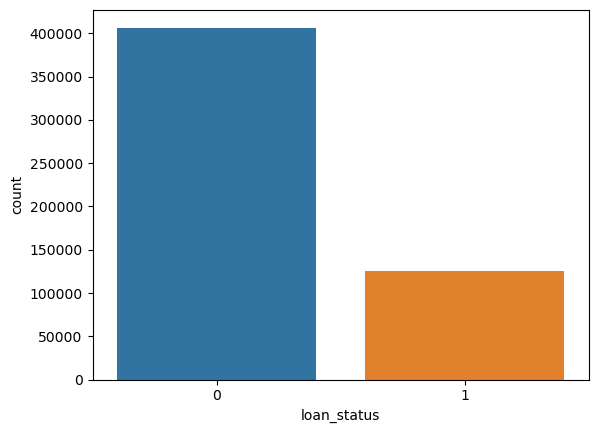

In [37]:
sns.countplot(data = df, x = 'loan_status')

#This shows we already dealing with an imbalanced dataset.

In [38]:
X = df.drop('loan_status', axis= 1)
y = df['loan_status']

In [39]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [40]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

In [41]:

# # Calculate the scale_pos_weight for handling class imbalance
# It's the ratio of number of negative class to the positive clas
count_neg = sum(y == 0)
count_pos = sum(y == 1)

scale_pos_weight_value = count_neg/count_pos

In [42]:
# Train the model
# Using early stopping & AUC as the evaluation metric        

model = xgb.XGBClassifier(n_estimators=1000, objective='binary:logistic',scale_pos_weight = scale_pos_weight_value)
model.fit(
    X_train, y_train, 
    eval_set=[(X_val, y_val)], 
    early_stopping_rounds=5,
    eval_metric="auc",
    verbose=True
)

/Users/osazeogbebor/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/osazeogbebor/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.94912
[1]	validation_0-auc:0.95838
[2]	validation_0-auc:0.96173
[3]	validation_0-auc:0.96378
[4]	validation_0-auc:0.96482
[5]	validation_0-auc:0.96574
[6]	validation_0-auc:0.96682
[7]	validation_0-auc:0.96767
[8]	validation_0-auc:0.96819
[9]	validation_0-auc:0.96852
[10]	validation_0-auc:0.96920
[11]	validation_0-auc:0.96972
[12]	validation_0-auc:0.96988
[13]	validation_0-auc:0.96995
[14]	validation_0-auc:0.97049
[15]	validation_0-auc:0.97065
[16]	validation_0-auc:0.97076
[17]	validation_0-auc:0.97092
[18]	validation_0-auc:0.97100
[19]	validation_0-auc:0.97112
[20]	validation_0-auc:0.97120
[21]	validation_0-auc:0.97176
[22]	validation_0-auc:0.97184
[23]	validation_0-auc:0.97193
[24]	validation_0-auc:0.97206
[25]	validation_0-auc:0.97215
[26]	validation_0-auc:0.97226
[27]	validation_0-auc:0.97233
[28]	validation_0-auc:0.97238
[29]	validation_0-auc:0.97239
[30]	validation_0-auc:0.97240
[31]	validation_0-auc:0.97244
[32]	validation_0-auc:0.97250
[33]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [43]:
#Predicting the probability scores for the positive class (e.g., 'Defaulter') for the test dataset
predict_prob = model.predict_proba(X_test)[:,1]

In [44]:
# Calculating the ROC AUC score to evaluate the model's performance on distinguishing between the classes
roc_auc_score(y_test,predict_prob)

0.9761158484896928

In [45]:
# Calculating the ROC AUC score to evaluate the model's performance on distinguishing between the classes
score = roc_auc_score(y_test, predict_prob)
print(f"ROC AUC Score: {score:.2f}")

# Conclusion
print(f"\nThe model achieved a ROC AUC score of {score:.2f}, indicating a high level of proficiency in distinguishing between the classes. This demonstrates the model's effectiveness for the task at hand. Further optimizations and real-world testing can be pursued in future iterations.")


ROC AUC Score: 0.98

The model achieved a ROC AUC score of 0.98, indicating a high level of proficiency in distinguishing between the classes. This demonstrates the model's effectiveness for the task at hand. Further optimizations and real-world testing can be pursued in future iterations.
